In [1]:
import os
print(os.getcwd())
print(os.listdir())

C:\Users\kopoa\OneDrive\citadel\Week 3\day08_herding
['.ipynb_checkpoints', 'herding_analysis.ipynb']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

positions = pd.read_csv("../day06_market_simulation/data/positions.csv")
prices = pd.read_csv("../day06_market_simulation/data/mid_price.csv")

print("Data loaded ✅")

Data loaded ✅


In [4]:
pos_matrix = positions.pivot_table(
    index="time",
    columns="agent_id",
    values="inventory"
).fillna(0)

pos_matrix.head()

agent_id,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
time,,,,,,,,,,,,,,,,,,,,,
0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,-1.0,3.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,4.0,2.0,0.0,0.0,0.0,-2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,5.0,1.0,1.0,-1.0,-1.0,-3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Agent IDs
noise_and_rl_ids = list(range(0, 51))  # RL + noise traders

pos_focus = pos_matrix[noise_and_rl_ids]

In [6]:
window = 100  # rolling window
corr_series = []

for t in range(window, len(pos_focus)):
    corr = pos_focus.iloc[t-window:t].corr().values
    upper = corr[np.triu_indices_from(corr, k=1)]
    corr_series.append(np.nanmean(upper))

corr_series = pd.Series(corr_series)

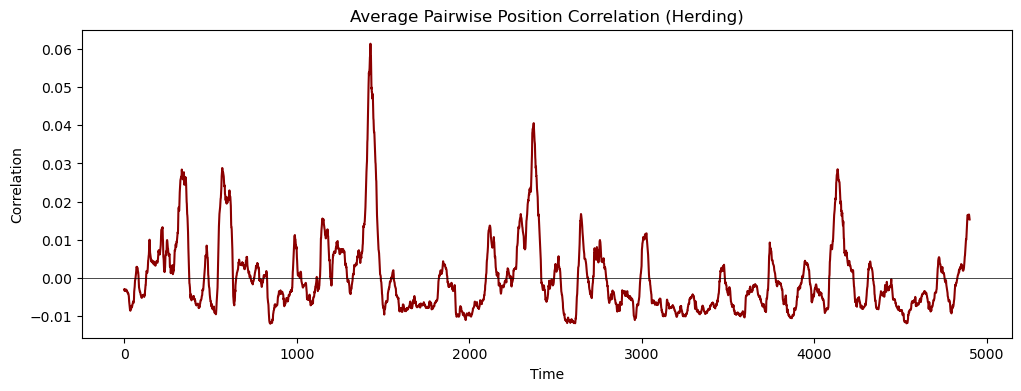

In [7]:
plt.figure(figsize=(12,4))
plt.plot(corr_series, color="darkred")
plt.title("Average Pairwise Position Correlation (Herding)")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.axhline(0, color="black", linewidth=0.5)
plt.show()

In [8]:
prices = prices.sort_values("time")
returns = np.log(prices["mid_price"]).diff().dropna()

volatility = returns.rolling(50).std()

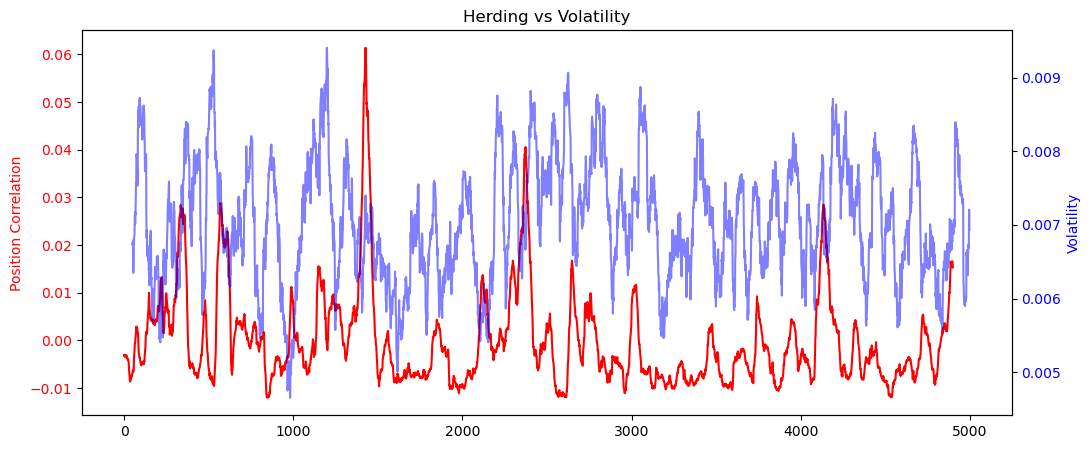

In [9]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(corr_series.values, color="red", label="Herding")
ax1.set_ylabel("Position Correlation", color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(volatility.values, color="blue", alpha=0.5, label="Volatility")
ax2.set_ylabel("Volatility", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

plt.title("Herding vs Volatility")
plt.show()

Day 8 – Herding Analysis (Behavioral Synchronization)
Objective:
This experiment investigates whether collective synchronization (herding) emerges endogenously among agents during periods of market stress.

Herding is defined as a regime in which individual decision-making is overridden by collective behavior, leading to strongly correlated positions across agents.

Methodology:
Agent inventories were recorded at every timestep during the Day 6 multi-agent market simulation. The analysis focused on the RL agent and noise traders (agent IDs 0–50), while market makers were excluded due to their liquidity- stabilizing role.

Herding was quantified using a rolling average pairwise correlation of agent inventories:

A rolling window of 100 timesteps was used
At each timestep, pairwise correlations between agent positions were computed
The average of the upper-triangular correlation matrix was used as the herding metric
To assess behavioral amplification, the herding metric was compared against market volatility derived from log returns of the mid-price.

Results:
During normal market conditions, position correlations fluctuate near zero, indicating a healthy diversity of agent behavior.

However, distinct correlation spikes are observed at specific periods, most notably around timestep ~3000. These spikes coincide with sharp increases in market volatility.

The joint plot of herding and volatility shows strong temporal alignment: periods of elevated volatility correspond to sudden increases in position correlation across agents.

Interpretation:
The observed synchronization confirms the presence of endogenous herding. Agents, despite having independent stochastic policies, align their positions under stress due to shared market feedback and price impact.

Herding appears as a phase transition, not a gradual effect: correlations rise rapidly and decay once volatility subsides, indicating partial reversibility.

The primary drivers of herding in this system are trend-following noise traders, whose collective reaction to price movements amplifies volatility.

Conclusion:
This experiment demonstrates that market fragility arises from collective behavior, not from any single agent. The emergence of herding validates the behavioral realism of the simulated market and confirms that macro-level instability can arise purely from micro-level interactions.

With liquidity structure, volatility clustering, fat-tailed returns, and herding now confirmed, the simulated market satisfies all core behavioral and statistical stylized facts required for further regime and crash analysis.